In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
file1 = "data/mouse_drug_data.csv"
file2 = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(file1)
clinical_trial_df = pd.read_csv(file2)

# Combine the data into a single dataset
drug_data_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")

# Display the data table for preview
drug_data_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
# Means of Tumor Volume
tumor_responses = drug_data_df.groupby(["Drug", "Timepoint"]).mean()

tumor_responses_df = pd.DataFrame(tumor_responses["Tumor Volume (mm3)"])
tumor_responses_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Sems of Tumor Volume
responses_sems = drug_data_df.groupby(["Drug", "Timepoint"]).sem()

responses_sems_df = pd.DataFrame(responses_sems["Tumor Volume (mm3)"])
responses_sems_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Transpose Drug Column - Means
tumor_responses_df = tumor_responses_df.reset_index()
tumor_responses_df = tumor_responses_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Transpose Drug Column - Sems
responses_sems = responses_sems.reset_index()
responses_sems = responses_sems.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

tumor_responses_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


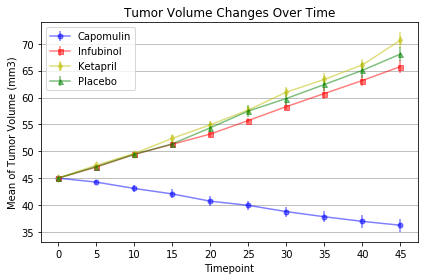

In [55]:
# Create list of timepoints
timepoints = list(tumor_responses_df.index.values)

# Create Scatter Plot showing tumor volume changes over time/treatment
plt.errorbar(timepoints, tumor_responses_df["Capomulin"], responses_sems["Capomulin"],
                   fmt="-o", markersize=5, color="b", alpha=0.5, label="Capomulin")
plt.errorbar(timepoints, tumor_responses_df["Infubinol"], responses_sems["Infubinol"],
                   fmt="-s", markersize=5, color="r", alpha=0.5, label="Infubinol")
plt.errorbar(timepoints, tumor_responses_df["Ketapril"], responses_sems["Ketapril"],
                   fmt="-d", markersize=5, color="y", alpha=0.5, label="Ketapril")
plt.errorbar(timepoints, tumor_responses_df["Placebo"], responses_sems["Placebo"],
                   fmt="-^", markersize=5, color="g", alpha=0.5, label="Placebo")
plt.title("Tumor Volume Changes Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Mean of Tumor Volume (mm3)")
plt.grid(axis="y")
plt.xticks(timepoints, timepoints)
plt.legend(loc="best")  
plt.tight_layout()

plt.savefig("Images/Tumor_Volume_Changes.png")
plt.show()

In [9]:
# Means of Metastatic Site Changes
met_changes = drug_data_df.groupby(["Drug", "Timepoint"]).mean()

met_changes_df = pd.DataFrame(met_changes["Metastatic Sites"])
met_changes_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Sems of Metastatic Site Changes
met_changes_sems = drug_data_df.groupby(["Drug", "Timepoint"]).sem()

met_changes_sems_df = pd.DataFrame(met_changes_sems["Metastatic Sites"])
met_changes_sems_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Transpose Drug Column - Means
met_changes_df = met_changes_df.reset_index()
met_changes_df = met_changes_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Transpose Drug Column - Sems
met_changes_sems_df = met_changes_sems_df.reset_index()
met_changes_sems_df = met_changes_sems_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

met_changes_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


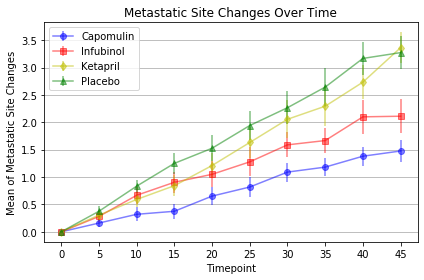

In [56]:
# Create Scatter Plot showing metastatic site changes over time/treatment
plt.errorbar(timepoints, met_changes_df["Capomulin"], met_changes_sems_df["Capomulin"],
                   fmt="-o", color="b", alpha=0.5, label="Capomulin")
plt.errorbar(timepoints, met_changes_df["Infubinol"], met_changes_sems_df["Infubinol"],
                   fmt="-s", color="r", alpha=0.5, label="Infubinol")
plt.errorbar(timepoints, met_changes_df["Ketapril"], met_changes_sems_df["Ketapril"],
                   fmt="-d", color="y", alpha=0.5, label="Ketapril")
plt.errorbar(timepoints, met_changes_df["Placebo"], met_changes_sems_df["Placebo"],
                   fmt="-^", color="g", alpha=0.5, label="Placebo")
plt.title("Metastatic Site Changes Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Mean of Metastatic Site Changes")
plt.xticks(timepoints, timepoints)
plt.grid(axis="y")
plt.legend(loc="best")  
plt.tight_layout()

plt.savefig("Images/Metastatic_Site_Changes.png")
plt.show()

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = drug_data_df.groupby(["Drug", "Timepoint"]).count()

# Convert to DataFrame
survival_rate_df = pd.DataFrame(survival_rate["Mouse ID"])
survival_rate_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [17]:
survival_rate_df = survival_rate_df.reset_index()
survival_rate_df = survival_rate_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


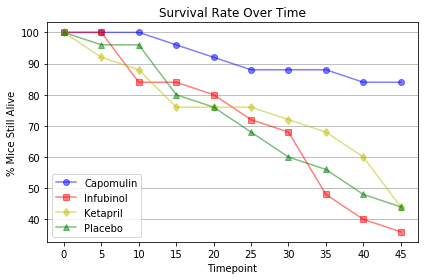

In [57]:
# Generate the Plot (Accounting for percentages)
survival_rate_capomulin = (survival_rate_df["Capomulin"]/max(survival_rate_df["Capomulin"]))*100
survival_rate_infubinol = (survival_rate_df["Infubinol"]/max(survival_rate_df["Infubinol"]))*100
survival_rate_ketapril = (survival_rate_df["Ketapril"]/max(survival_rate_df["Ketapril"]))*100
survival_rate_placebo = (survival_rate_df["Placebo"]/max(survival_rate_df["Placebo"]))*100

plt.errorbar(timepoints, survival_rate_capomulin, fmt="-o", color="b", alpha=0.5, label="Capomulin")
plt.errorbar(timepoints, survival_rate_infubinol, fmt="-s", color="r", alpha=0.5, label="Infubinol")
plt.errorbar(timepoints, survival_rate_ketapril, fmt="-d", color="y", alpha=0.5, label="Ketapril")
plt.errorbar(timepoints, survival_rate_placebo, fmt="-^", color="g", alpha=0.5, label="Placebo")

plt.title("Survival Rate Over Time")
plt.xlabel("Timepoint")
plt.ylabel("% Mice Still Alive")
plt.xticks(timepoints, timepoints)
plt.grid(axis="y")
plt.legend(loc="best")  
plt.tight_layout()

plt.savefig("Images/Survival_Rate.png")
plt.show()

In [22]:
# Calculate total % tumor volume change per treatment
first_timepoint = tumor_responses_df.iloc[0, :]
last_timepoint = tumor_responses_df.iloc[len(timepoints)-1, :]

total_volume_change = ((last_timepoint - first_timepoint)/first_timepoint)*100
total_volume_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

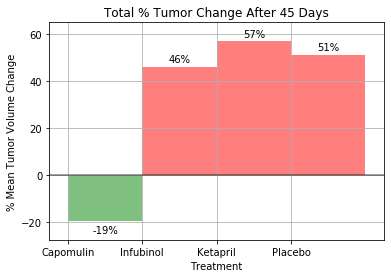

In [52]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (total_volume_change["Capomulin"], total_volume_change["Infubinol"],
                   total_volume_change["Ketapril"], total_volume_change["Placebo"])

treatments = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Create list of bar colors for bar graph
colors = []

for value in percent_changes:
    if value >= 0:
        colors.append('r')     
    else:
        colors.append('g')

# Generate graph
fig, ax = plt.subplots()
rects1 = ax.bar(treatments, percent_changes, color=colors, alpha=0.5, width=1)
ax.set_title("Total % Tumor Change After 45 Days")
ax.set_xlabel("Treatment")
ax.set_ylabel("% Mean Tumor Volume Change")
plt.hlines(0, -0.75, len(treatments)-0.25, alpha=0.5)
x_axis = np.arange(len(treatments))
tick_locations = [value-0.5 for value in x_axis]
plt.xticks(tick_locations, treatments)
plt.xlim(-0.75, len(treatments)-0.25)
plt.ylim(min(percent_changes)-8, max(percent_changes)+8)
plt.grid()

# Define and execute function to add labels to graph
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height < 0:
            ax.text(rect.get_x() + rect.get_width()/2., height - 6,
                '%d' % int(height) + "%",
                ha = 'center', va='bottom')   
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height+1,
               '%d' % int(height) + "%",
                ha = 'center', va='bottom')
        
autolabel(rects1)

plt.savefig("Images/Total_Tumor_Change.png")
plt.show()

In [51]:
# 3 OBSERVATIONS ABOUT RESULTS
# -----------------------------

# OBSERVATION 1:
# --------------

# Capomulin exhibits a reduction of nearly 20% in the mean tumor volume of treated mice after 45 days.
# Mice treated with any of the other three drugs all exhibit an increase of over 45% in tumor volume over the same period.

# OBSERVATION 2:
# --------------

# Mice treated with Capomulin exhibit fewer metastatic site changes over 45 days than mice treated with any of the
# other three drugs analyzed in this study. This indicates that the spreading of cancer is slowed down due to the effect
# of Capomulin.

# OBSERVATION 3:
# --------------
# Mice treated with Capomulin demonstrate a survival rate of over 80%. All the other treatments result in a survival rate
# of 60% to less than 40%.

